In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [21]:
df = pd.read_csv('Iris.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
df.drop('Id', inplace=True, axis=1)

#### Target Label masih categorical --> ubah jadi angka

In [24]:
category = pd.get_dummies(df['Species'])
df = pd.concat([df, category],axis=1)
df.drop('Species', inplace=True, axis=1)

In [25]:
df_values = df.values

In [26]:
X = df_values[:,:4]
y = df_values[:,4:]

In [27]:
X = MinMaxScaler().fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [29]:
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(4,)),
    Dense(units=64, activation='relu'),
    Dense(units=3, activation='softmax')
])

In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.1233 - accuracy: 0.3429
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0784 - accuracy: 0.6476
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0418 - accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0108 - accuracy: 0.5524
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9831 - accuracy: 0.5905
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9594 - accuracy: 0.6286
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9365 - accuracy: 0.6476
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9123 - accuracy: 0.6857
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8870 - accuracy: 0.6857
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8620 - accuracy: 0.6857
Epoch 11/100
4/4 [===========

In [32]:
model.evaluate(X_test, y_test)

AttributeError: 'History' object has no attribute 'evaluate'

In [ ]:
model.predict([[0.43888889, 0.41666667, 0.57627119, 0.14166667]])

1/1 [==============================] - 0s 87ms/step


array([[0.0529925 , 0.94570225, 0.00130531]], dtype=float32)

### Plot Loss dan Akurasi dari Trained Model

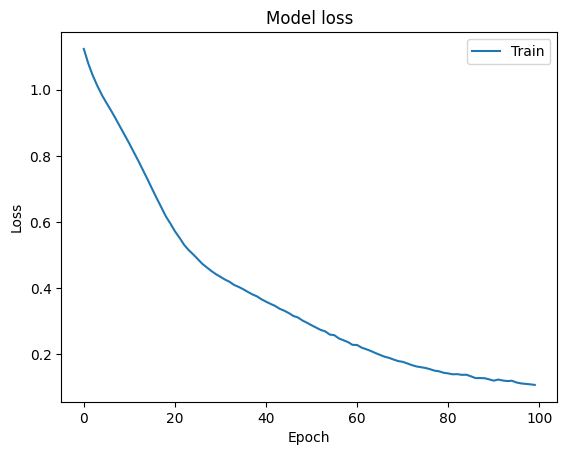

In [33]:
import matplotlib.pyplot as plt

plt.plot(model.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

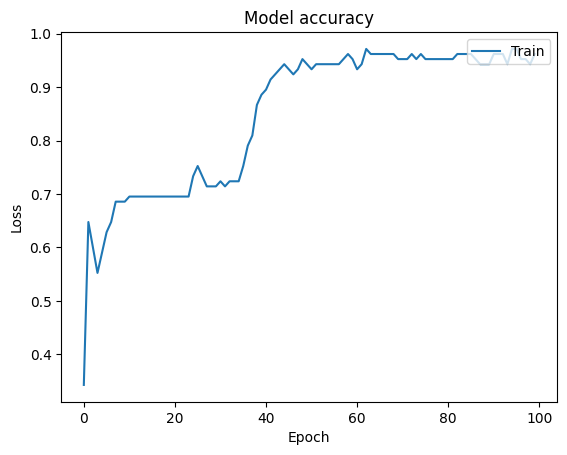

In [34]:
import matplotlib.pyplot as plt

plt.plot(model.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
    